<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/TextAnalytics/Basic_text_processing_using_Scikit_Learn_and_Classifying_Newsgroup_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import package from scikit-learn containing 20newsgroups data 
from sklearn.datasets import fetch_20newsgroups

full_train_data_labels = fetch_20newsgroups(subset = 'train')

#print the labels in the data
#print(type(full_train_data_labels.target_names))
print(list(set(full_train_data_labels.target_names)))


['comp.windows.x', 'sci.space', 'sci.med', 'talk.politics.mideast', 'alt.atheism', 'comp.sys.mac.hardware', 'comp.sys.ibm.pc.hardware', 'talk.politics.guns', 'misc.forsale', 'comp.graphics', 'talk.politics.misc', 'rec.autos', 'sci.electronics', 'comp.os.ms-windows.misc', 'rec.motorcycles', 'talk.religion.misc', 'soc.religion.christian', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt']


In [ ]:
categories_list = ['comp.graphics', 'sci.med']

train_data_labels = fetch_20newsgroups(subset='train',categories=categories_list, shuffle=True)
print(list(set(train_data_labels.target_names)))

#print a few documents and corresponding labels 
num_documents = 3
for i in range(num_documents):
  print('Document:')
  print(train_data_labels.data[i])
  print('label:',train_data_labels.target[i])
  print('##########################################################')

  

['comp.graphics', 'sci.med']
Document:
From: zyeh@caspian.usc.edu (zhenghao yeh)
Subject: Re: Need polygon splitting algo...
Organization: University of Southern California, Los Angeles, CA
Lines: 25
Distribution: world
NNTP-Posting-Host: caspian.usc.edu
Keywords: polygons, splitting, clipping


In article <1qvq4b$r4t@wampyr.cc.uow.edu.au>, g9134255@wampyr.cc.uow.edu.au (Coronado Emmanuel Abad) writes:
|> 
|> The idea is to clip one polygon using another polygon (not
|> necessarily rectangular) as a window.  My problem then is in
|> finding out all the new vertices of the resulting "subpolygons"
|> from the first one.  Is this simply a matter of extending the
|> usual algorithm whereby each of the edges of one polygon is checked
|> against another polygon???  Is there a simpler way??
|> 
|> Comments welcome.
|> 
|> Noel.

	It depends on what kind of the polygons. 
	Convex - simple, concave - trouble, concave with loop(s)
	inside - big trouble.

	Of cause, you can use the box test to av

$\textbf{About converting text features to numerical attributes}$ $\textit{ (From scikit-learn website)}$: 

Scikit-learn provides utilities for the most common ways to extract numerical features from text content, namely:


1.   $\textbf{tokenizing}$ strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.
2.   $\textbf{counting}$ the occurrences of tokens in each document.
3.   $\textbf{normalizing and weighting}$ with diminishing importance for tokens that occur in majority of samples / documents.


In this scheme, features and samples are defined as follows:

1.   Each individual token occurrence frequency (normalized or not) is treated as a $\textbf{feature}$
2.   The vector of all the token frequencies for a given document is considered a $\textbf{multivariate sample}$.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
corpus = [
...     'This is the first sample document.',
...     'This is another document called the second sample document.',
...     'And the third sample document.',
...     'Is this the first sample document?',
... ]

In [ ]:
X = vectorizer.fit_transform(corpus)
print(type(X))
#print(X)

<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:
#unique words obtained from the corpus. Note: All words have lower case letters
print(vectorizer.get_feature_names())

['and', 'another', 'called', 'document', 'first', 'is', 'sample', 'second', 'the', 'third', 'this']


$\textbf{Note:}$ CountVectorizer by default tokenizes string by extracting words of at least 2 letters.

In [ ]:
'This is another document called the second sample document.',

In [ ]:
print(X.toarray())

[[0 0 0 1 1 1 1 0 1 0 1]
 [0 1 1 2 0 1 1 1 1 0 1]
 [1 0 0 1 0 0 1 0 1 1 0]
 [0 0 0 1 1 1 1 0 1 0 1]]


In [ ]:
print(vectorizer.vocabulary_)

{'this': 10, 'is': 5, 'the': 8, 'first': 4, 'sample': 6, 'document': 3, 'another': 1, 'called': 2, 'second': 7, 'and': 0, 'third': 9}


In [ ]:
#to get the feature identifier of a particular word 
print(vectorizer.vocabulary_.get('called'))

2


In [ ]:
#we can use the vectorizer object created earlier to encode new sentences 
#However if the new sentence contains new words, they would not be added to the vocabulary 
vectorizer.transform(['completely new sentence.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
vectorizer.transform(['another new sample document.']).toarray()

array([[0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0]])

In [ ]:
#if we want to rebuild the vectorizer we must include the new documents in corpus
#and then reconstruct again 
#Consider this as an exercise 

In [ ]:
#recall: in our corpus the first document is 'This is the first sample document.', 
#and the last document is 'Is this the first sample document?'
print(X.toarray()[0])
print(X.toarray()[-1])

[0 0 0 1 1 1 1 0 1 0 1]
[0 0 0 1 1 1 1 0 1 0 1]


In [ ]:
#To account for the word order we can use bigrams and n-grams containing multiple words as features 
#we will build another vectorizer using bigram features now 
bigram_vectorizer = CountVectorizer(ngram_range=(1,2)) #consider both unigrams and bigrams 

In [ ]:
X_unigram_bigram = bigram_vectorizer.fit_transform(corpus)
print(type(X_unigram_bigram))

<class 'scipy.sparse.csr.csr_matrix'>


In [ ]:

print(bigram_vectorizer.get_feature_names())

['and', 'and the', 'another', 'another document', 'called', 'called the', 'document', 'document called', 'first', 'first sample', 'is', 'is another', 'is the', 'is this', 'sample', 'sample document', 'second', 'second sample', 'the', 'the first', 'the second', 'the third', 'third', 'third sample', 'this', 'this is', 'this the']


In [ ]:
print(len(bigram_vectorizer.get_feature_names()))

27


In [ ]:
bigram_vectorizer.vocabulary_

{'and': 0,
 'and the': 1,
 'another': 2,
 'another document': 3,
 'called': 4,
 'called the': 5,
 'document': 6,
 'document called': 7,
 'first': 8,
 'first sample': 9,
 'is': 10,
 'is another': 11,
 'is the': 12,
 'is this': 13,
 'sample': 14,
 'sample document': 15,
 'second': 16,
 'second sample': 17,
 'the': 18,
 'the first': 19,
 'the second': 20,
 'the third': 21,
 'third': 22,
 'third sample': 23,
 'this': 24,
 'this is': 25,
 'this the': 26}

In [ ]:
X_unigram_bigram.toarray()

array([[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1]])

In [ ]:
#Now let us compare the features of first and last document
print(X_unigram_bigram.toarray()[0])
print(X_unigram_bigram.toarray()[-1])

[0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0]
[0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1]


In [ ]:
#Exercise: Try to build a vectorizer with unigram, bigram and trigram features 

$\textbf{TF-IDF}:$ The term frequency-inverse document frequency (TF-IDF) re-weighting is useful to reduce the dominance of count based features used for very frequent words which might not have much significance.

$\textbf{Term Frequency}:$ $\texttt{tf(t,d)}$ denotes the frequency of term $\texttt{t}$ in document $\texttt{d}$. 

$\textbf{Inverse Document Frequency}:$ $\texttt{idf(t)}$ is proportional to the inverse of the number of documents containing the term $\texttt{t}$. The formula to compute $\texttt{idf(t)}$ is: 

$
\begin{align}
\texttt{idf(t)} = \log \frac{1+n}{1+\texttt{df(t)}} + 1
\end{align}
$

where $n$ denotes the number of documents in the corpus and $\texttt{df(t)}$ denotes the number of documents in the corpus containing term $\texttt{t}$. The addition with $1$ is useful for avoiding numerical issues. 

Thus $\textbf{TF-IDF}$ is calculated as: $\texttt{tf-idf(t,d)}=\texttt{tf(t,d)} \times \texttt{idf(t)}$.  

After composing the vector for each document, the vectors are normalized so that they are of unit length in terms of Euclidean norm. 

In [ ]:
corpus_2 = [ 'The boy came to the school in the morning by the bus.', 
             'He took his book and wrote in the book using his pencil.',
             'He played the game using the ball.',
             'He took his bag, left the school by the bus and reached his home.',           
             ]

In [ ]:
#a simple count based vectorizer gives too much significance to words like "the", "his"
vectorizer_corpus_2 = CountVectorizer()

In [ ]:
X_corpus_2 = vectorizer_corpus_2.fit_transform(corpus_2)

In [ ]:
print(vectorizer_corpus_2.get_feature_names()) 
print('num features:',len(vectorizer_corpus_2.get_feature_names()))

['and', 'bag', 'ball', 'book', 'boy', 'bus', 'by', 'came', 'game', 'he', 'his', 'home', 'in', 'left', 'morning', 'pencil', 'played', 'reached', 'school', 'the', 'to', 'took', 'using', 'wrote']
num features: 24


In [ ]:
print(vectorizer_corpus_2.vocabulary_)

{'the': 19, 'boy': 4, 'came': 7, 'to': 20, 'school': 18, 'in': 12, 'morning': 14, 'by': 6, 'bus': 5, 'he': 9, 'took': 21, 'his': 10, 'book': 3, 'and': 0, 'wrote': 23, 'using': 22, 'pencil': 15, 'played': 16, 'game': 8, 'ball': 2, 'bag': 1, 'left': 13, 'reached': 17, 'home': 11}


In [ ]:
X_corpus_2.toarray()

array([[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 4, 1, 0,
        0, 0],
       [1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
        1, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0,
        1, 0],
       [1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 1,
        0, 0]])

In [ ]:
#Let us transform the features using a tf-idf based weight scheme
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

In [ ]:
tfidf_X_corpus_2 = tfidf_transformer.fit_transform(X_corpus_2)

In [ ]:
print(tfidf_X_corpus_2.toarray())

[[0.         0.         0.         0.         0.30367981 0.23942465
  0.23942465 0.30367981 0.         0.         0.         0.
  0.23942465 0.         0.30367981 0.         0.         0.
  0.23942465 0.63389088 0.30367981 0.         0.         0.        ]
 [0.23096381 0.         0.         0.58589662 0.         0.
  0.         0.         0.         0.18698511 0.46192763 0.
  0.23096381 0.         0.         0.29294831 0.         0.
  0.         0.15287258 0.         0.23096381 0.23096381 0.29294831]
 [0.         0.         0.44201611 0.         0.         0.
  0.         0.         0.44201611 0.28213316 0.         0.
  0.         0.         0.         0.         0.44201611 0.
  0.         0.46132469 0.         0.         0.34849058 0.        ]
 [0.23673759 0.30027162 0.         0.         0.         0.23673759
  0.23673759 0.         0.         0.19165948 0.47347519 0.30027162
  0.         0.30027162 0.         0.         0.         0.30027162
  0.23673759 0.31338837 0.         0.2367

In [ ]:
#check if each row has unit Euclidean norm
import numpy as np
X1 = tfidf_X_corpus_2.toarray()
for i in range(len(X1)):
  print(np.linalg.norm(X1[i]))

1.0
1.0
0.9999999999999999
1.0


$\textbf{Getting back to 20 Newsgroups data:}$ We now consider the text processing of the data corresponding to two categories $\texttt{comp.graphics}$, $\texttt{sci.med}$.  

In [ ]:
print('num documents:', len(train_data_labels.data))

num documents: 1178


In [ ]:
data_20newsgroups_vectorizer = CountVectorizer() #we consider only unigrams here 

In [ ]:
X_train_20newsgroups = data_20newsgroups_vectorizer.fit_transform(train_data_labels.data)

In [ ]:
num_features = len(data_20newsgroups_vectorizer.get_feature_names())
print('num features:', num_features)

num features: 24614


In [ ]:
print(X_train_20newsgroups.toarray().shape)

(1178, 24614)


In [ ]:
num_samples = X_train_20newsgroups.toarray().shape[0]
print('num samples:', num_samples)

num samples: 1178


In [ ]:
y_train_20newsgroups = train_data_labels.target
print(y_train_20newsgroups.shape)

(1178,)


In [ ]:
import torch
class SimpleFeedforwardNet(torch.nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(SimpleFeedforwardNet, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.output_size = output_size
            #first fully connected layer connecting input to hidden layer
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            #second fully connected layer connecting hidden layer to output layer
            self.fc2 = torch.nn.Linear(self.hidden_size, self.output_size)
            self.sigmoid = torch.nn.Sigmoid()        
        #Define how forward pass is to be performed
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            output = self.fc2(relu)
            output = self.sigmoid(output)
            return output

In [ ]:
model = SimpleFeedforwardNet(num_features, 128,1) 
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
#set model to train mode
model.train()

num_epochs = 400

loss_epochs = []
x_train = torch.FloatTensor(X_train_20newsgroups.toarray())
y_train = torch.FloatTensor(y_train_20newsgroups).view(num_samples, 1)

for epoch in range(num_epochs):
  #set optimizer gradients to zero     
  optimizer.zero_grad()    
  #Get prediction output from model on train data using forward pass 
  y_pred = model(x_train)    
  #compute loss between predicted labels and actual labels
  loss = criterion(y_pred, y_train)
  #keeping track of losses
  loss_epochs.append(loss) 
  #It is useful to compute the performance of model on train data in terms of accuracy
  y_pred_cpu = y_pred.squeeze().detach().cpu().numpy()
  #print(type(y_pred_cpu))
  y_pred_cpu = np.multiply(y_pred_cpu>0.5,1)
  #print(y_pred_cpu)
  #print(y_train_20newsgroups)
  train_accuracy = 100.*np.sum(1-np.abs(y_pred_cpu-y_train_20newsgroups))/len(y_train_20newsgroups)
  print('Epoch {}: train loss: {} train accuracy: {}'.format(epoch, loss.item(), train_accuracy))   
  # Backward pass to propagate loss (or error) gradients 
  loss.backward() #this is automatically taken care of by Pytorch
  optimizer.step()

Epoch 0: train loss: 0.6939827799797058 train accuracy: 49.745331069609506
Epoch 1: train loss: 0.6904149651527405 train accuracy: 50.254668930390494
Epoch 2: train loss: 0.6876462697982788 train accuracy: 50.33955857385399
Epoch 3: train loss: 0.685201108455658 train accuracy: 50.33955857385399
Epoch 4: train loss: 0.6829267144203186 train accuracy: 50.42444821731749
Epoch 5: train loss: 0.6807618737220764 train accuracy: 50.42444821731749
Epoch 6: train loss: 0.6786473393440247 train accuracy: 50.42444821731749
Epoch 7: train loss: 0.6766060590744019 train accuracy: 50.50933786078099
Epoch 8: train loss: 0.6746106743812561 train accuracy: 50.59422750424448
Epoch 9: train loss: 0.6726210713386536 train accuracy: 50.59422750424448
Epoch 10: train loss: 0.6706365346908569 train accuracy: 50.84889643463497
Epoch 11: train loss: 0.6686738729476929 train accuracy: 51.01867572156197
Epoch 12: train loss: 0.6667467951774597 train accuracy: 51.188455008488965
Epoch 13: train loss: 0.664862036

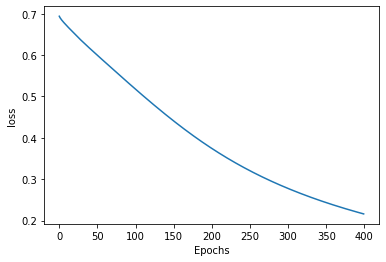

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loss_epochs)
plt.ylabel('loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
test_data_labels = fetch_20newsgroups(subset='test',categories=categories, shuffle=True)

X_test_20newsgroups = data_20newsgroups_vectorizer.transform(test_data_labels.data) # we only use transform
print(X_test_20newsgroups.shape)
y_test_20newsgroups = test_data_labels.target

num_test_samples = X_test_20newsgroups.toarray().shape[0]
print('num test samples:',num_test_samples)



(785, 24614)
num test samples: 785


In [ ]:
#set the neural net model to eval mode for testing
model.eval()

x_test = torch.FloatTensor(X_test_20newsgroups.toarray())
y_test = torch.FloatTensor(y_test_20newsgroups).view(num_test_samples, 1)

y_test_pred = model(x_test) #pass the test data to the model and get the predictions

y_test_pred_cpu = y_test_pred.squeeze().detach().cpu().numpy()
y_test_pred_cpu = np.multiply(y_test_pred_cpu>0.5,1)

#print(y_test_20newsgroups)
#print(y_test_pred_cpu)
test_accuracy = 100.*np.sum(1-np.abs(y_test_pred_cpu-y_test_20newsgroups))/len(y_test_20newsgroups)

print('Test set accuracy:',test_accuracy)



Test set accuracy: 85.85987261146497


In [ ]:
newsgroup_test_corpus = ['The monitor in operation theatre has some snag', 
                         'What is the RAM size used in the PC?',
                         'RBC and Haemoglobin are below normal.',
                         'Renal disease is on the rise.',
                         'Neurologists believe that this case is rare.']
X_test_corpus = data_20newsgroups_vectorizer.transform(newsgroup_test_corpus) # we only use transform
print(X_test_corpus.shape)

num_test_samples = X_test_corpus.toarray().shape[0]
print('num test samples:',num_test_samples)

model.eval()

x_test = torch.FloatTensor(X_test_corpus.toarray())

y_test_pred = model(x_test)

y_test_pred_cpu = y_test_pred.squeeze().detach().cpu().numpy()
y_test_pred_cpu = np.multiply(y_test_pred_cpu>0.5,1)

print('predictions:')
print(y_test_pred_cpu)

(5, 24614)
num test samples: 5
predictions:
[0 0 1 0 1]


$\large{\textbf{Exercise}}$

1. (a) Use unigram and bigram features in the code above and perform training using an appropriate feed forward network. Compute train set and test set accuracies. 
(b) Use unigram, bigram and trigram features in the code above and perform training using an appropriate feed forward network. Compute train set and test set accuracies. 
(c) Compare and contrast the train set and test set accuracies for parts (a) and (b) with those obtained in the code above. 

2. Use other classification techniques like SVM, decision tree, random forest, KNN for the classification problem above using (a) unigram, (b) unigram and bigram (c) unigram, bigram and trigram features. In each case, compute the train set and test set accuracies. Compare your results with those obtained from feed forward network above. 

2. (a). Select your $k$ favorite classes of newsgroups and perform multi-class classification training using the feed forward network (by modifying the output layer). Use unigram, bigram and trigram features. Compute train set and test set accuracies. 
   (b) Use other classification techniques like SVM, decision tree, random forests, KNN for the multi-class classification problem and compute the train set and test set accuracies. Compare your results with those obtained from feed forward network used in part (a). 
